# Unity Reacher20 Continuous Control

---

The [`drl_ctrl`](https://github.com/daraliu/drl-continuous-control) package is inspired by the examples from [Udacity Deep Reinforcent Learning Nano Degree repository](https://github.com/udacity/deep-reinforcement-learning).

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


from unityagents import UnityEnvironment
import pandas as pd

from drl_ctrl import control
from drl_ctrl import scores_util as su
from drl_ctrl import path_util as pu

import warnings
warnings.filterwarnings('ignore')

## Set training output dir path and training hyper parameters

In [3]:
output_dir = "../training_output/best_agent"
agent_type = 'DDPG'

best_params_so_far = {
 'n_episodes': 500,
 'update_every': 10,
 'num_updates': 20,
 'buffer_size': 1_000_000,
 'batch_size': 1024,
 'gamma_discount_factor': 0.95,
 'mean_score_threshold': 30.0,
 'max_t': 1000,
 'learning_rate_actor': 0.002,
 'learning_rate_critic': 0.001,
 'tau_soft_update': 0.001,
 'l2_weight_decay': 0,
 'has_ou_noise': True,
 'ou_noise_mu': 0.0,
 'ou_noise_theta': 0.15,
 'ou_noise_sigma': 0.1,
 'agent_seed': 111111,
 'logging_freq': 1}

## Create Unity Reacher 20 Environment

In [4]:
env = UnityEnvironment(file_name="../Reacher20_Linux/Reacher.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## Train a DDPG agent

In [5]:
control.training(
    env,
    output_dir=output_dir,
    **best_params_so_far)

INFO:drl_ctrl.control:Ensuring output directory exists: ../training_output/best_agent
Episode 1	Average Score: 0.38
Episode 2	Average Score: 0.59
Episode 3	Average Score: 0.73
Episode 4	Average Score: 0.90
Episode 5	Average Score: 1.27
Episode 6	Average Score: 1.88
Episode 7	Average Score: 3.10
Episode 8	Average Score: 5.16
Episode 9	Average Score: 7.45
Episode 10	Average Score: 9.97
Episode 11	Average Score: 12.40
Episode 12	Average Score: 14.60
Episode 13	Average Score: 16.48
Episode 14	Average Score: 18.11
Episode 15	Average Score: 19.53
Episode 16	Average Score: 20.77
Episode 17	Average Score: 21.86
Episode 18	Average Score: 22.84
Episode 19	Average Score: 23.72
Episode 20	Average Score: 24.50
Episode 21	Average Score: 25.20
Episode 22	Average Score: 25.83
Episode 23	Average Score: 26.41
Episode 24	Average Score: 26.94
Episode 25	Average Score: 27.43
Episode 26	Average Score: 27.88
Episode 27	Average Score: 28.30
Episode 28	Average Score: 28.70
Episode 29	Average Score: 29.06
Episo

## Plot training score

In [16]:
df_scores = su.read_scores(output_dir)
pd.set_option('display.max_rows', 500)
df_scores

,episode,score
0,1,0.385000
1,2,0.799000
2,3,0.996000
3,4,1.429000
4,5,2.750000
5,6,4.892000
6,7,10.443000
7,8,19.597500
8,9,25.791499
9,10,32.631499


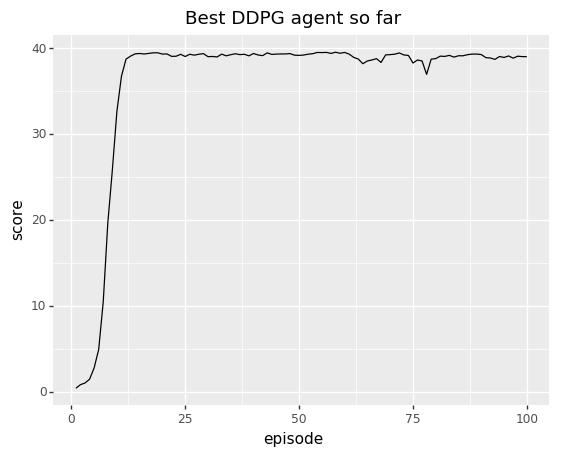

<ggplot: (-9223363290954882542)>

In [11]:
p_scores = su.plot_scores(df_scores, "Best DDPG agent so far")
p_scores

In [7]:
p_scores.save("../img/best_score_so_far.png")

## Run a demo of a Random Agent

In [ ]:
control.demo_random(env)

## Run a demo of the trained agent

In [ ]:
control.demo(env, output_dir)

## Uncomment and run to close enviroment

In [5]:
# env.close()